In [1]:
import json
from pathlib import Path

In [25]:
def gen_metrics_file_path(base_dir: str, secondary_prefix: str, tertiary_prefix: str):
    base_path = Path(base_dir)

    def file_finder(path: Path, prefix):
        for child in path.iterdir():
            if prefix in child.name: # child.name.startswith(prefix):
#                 print ("child.name", child.name)
                yield child

    for secondary in file_finder(base_path, secondary_prefix):
        if secondary.is_dir():
            # print(f"secondary: {secondary}")
            for teriary in file_finder(secondary, tertiary_prefix):
                # print(f"teriary: {teriary}")
                try:
                    return next(file_finder(teriary, "test_metrics.json"))
                except:
                    print(f"can't find test_metrics in {teriary}")

In [39]:
name = ["base", "soft", "ed", "ep", "dvae"]
BASE_DIR = ["____lfms_base_len", "___lfms_soft_len", "____lfms_ed_len", "___lfms_ep_len", "___lfms_dvae_len"]
SECOND_DIR = ["-len-10", "-len-15", "-len-20"]
THIRD_DIR = ["gru4rec", "student", "student", "student", "student"]

In [40]:
name2metric = {}

for n, b, t in zip(name, BASE_DIR, THIRD_DIR):
    for s in SECOND_DIR:
        p = gen_metrics_file_path(b, s, t)
        
        with p.open('r') as f:
            j = json.load(f)
            
            name2metric[n+s] = j

In [41]:
import matplotlib.pyplot as plt

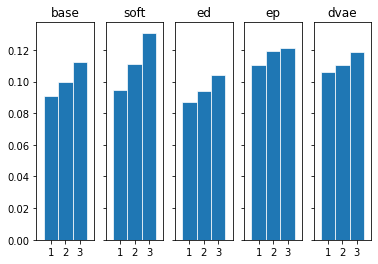

In [42]:
figs, axs = plt.subplots(1, 5, sharey=True)
METRIC = "Recall@5"

for i, n in enumerate(name):
    m = []
    for length in SECOND_DIR:
        key = n+length
        m.append(name2metric[key][METRIC])
    axs[i].bar([1, 2, 3], m, width=1, edgecolor='white', linewidth=0.7)
    axs[i].set(xlim=(0, 4), xticks=[1, 2, 3])
    axs[i].set_title(n)

plt.show()